In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Coaches = pd.read_json('coaches/coaches.json')
Players = pd.read_json('players/players.json')
Events = pd.read_json('events/events_England.json')
Teams = pd.read_json('teams/teams.json')
Matches = pd.read_json('matches/matches_England.json')

In [2]:
# Add column 'Nation' on Teams
Nation = pd.DataFrame([x['name'] for x in Teams['area']],columns=['Nation'])
Teams = pd.merge(Teams, Nation, left_index=True, right_index=True)
Teams_England = Teams[((Teams['Nation'] == 'England') | (Teams['Nation'] == 'Wales')) & (Teams['type'] == 'club')]

In [3]:
# Generate England_Players DataFrame
England_Teams_ID_list = list(Teams_England['wyId']) # list teams Id
player_list =[]
for x in England_Teams_ID_list:
    player_list.append(Players[Players['currentTeamId'] ==x ])

England_Players = pd.concat(player_list) #DF with England Players info

In [4]:
# Generate England_Events DataFrame
England_Players_ID_list = list(England_Players['wyId'])
event_list =[]
for x in England_Players_ID_list:
    event_list.append(Events[Events['playerId'] == x])

England_Events = pd.concat(event_list) #DF with England Events info

In [5]:
England_Events_Air_duel = England_Events[England_Events['subEventName']=='Air duel'] # sub-DataFrame with player 'passes'

In [6]:
count_total_air_duel = {} # dict containing the sums of air_duel for each player initialized to 0
count_accurate_air_duel = {} # dict containing the sums of accurate air_duel for each player initialized to 0
count_ratio_air_duel = {} # dict containing the ratio = count_accurate_air_duel/count_total_air_duel

# initialize
for x in England_Players_ID_list:
    count_total_air_duel.update({x:0})
    count_accurate_air_duel.update({x:0})
    count_ratio_air_duel.update({x:0})

# count
i = 0
for x in England_Events_Air_duel['playerId']:
    count_total_air_duel[x] += 1
    if str(England_Events_Air_duel['tags'].iloc[i]).find('1801') > 0:
        count_accurate_air_duel[x] += 1
    i +=1    

In [7]:
n = 10 # minimum threshold

for x in England_Players_ID_list: 
    if count_total_air_duel[x] < n:
        del count_ratio_air_duel[x]
    else:
        count_ratio_air_duel[x] = count_accurate_air_duel[x] / count_total_air_duel[x]

In [8]:
# Create player_ratio_air_duel DataFrame
lst_player = []
lst_ratio_air_duel = []
for x in count_ratio_air_duel:
    lst_player.append(x)
    lst_ratio_air_duel.append(count_ratio_air_duel[x])
player_ratio_air_duel = pd.DataFrame({'PlayersId':lst_player, 'Ratio air duel': lst_ratio_air_duel})

In [9]:
air_duel_height = pd.merge(player_ratio_air_duel, England_Players[['height', 'wyId', 'shortName']], left_on='PlayersId', right_on='wyId' )

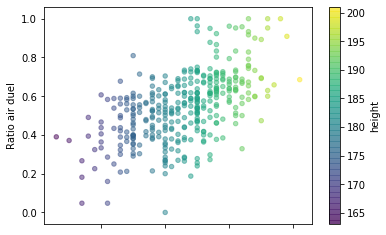

In [10]:
air_duel_height.plot.scatter(x='height',y='Ratio air duel',c='height',colormap='viridis', alpha=0.5)
plt.show()